# **IRIS FLOWER CLASSIFICATION**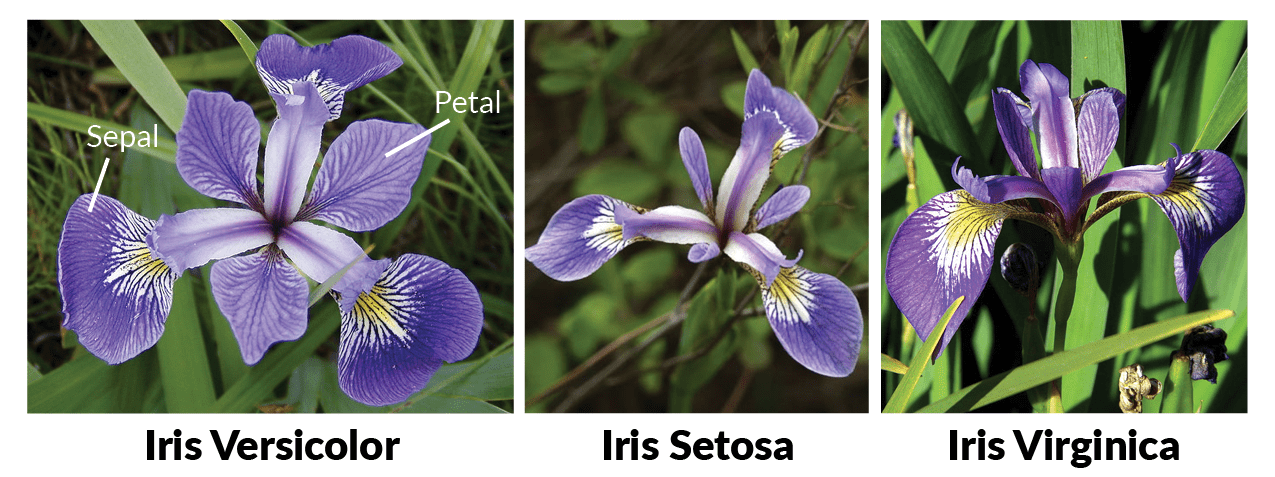

### **About Dataset**

*The Iris flower dataset consists of three species: setosa, versicolor,
and virginica.These species can be distinguished based on their
measurements.The measurements
of Iris flowers categorized by their respective species.*

## **Objective**

*Build a machine learning model that can learn from
these measurements and accurately classify the Iris flowers into
their respective species.*

In [36]:
# Import the needed libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read a csv file
df = pd.read_csv('/content/IRIS.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
# Get a quick info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# **Data Preprocessing Part**

In [4]:
# Detecting the null values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [5]:
# Checking the Unique values of Sepal_length Column
df.sepal_length.unique()

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.4, 4.8, 4.3, 5.8, 5.7, 5.2, 5.5,
       4.5, 5.3, 7. , 6.4, 6.9, 6.5, 6.3, 6.6, 5.9, 6. , 6.1, 5.6, 6.7,
       6.2, 6.8, 7.1, 7.6, 7.3, 7.2, 7.7, 7.4, 7.9])

In [6]:
# Checking the Unique values of Sepal_width Column
df.sepal_width.unique()

array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 2.9, 3.7, 4. , 4.4, 3.8, 3.3,
       4.1, 4.2, 2.3, 2.8, 2.4, 2.7, 2. , 2.2, 2.5, 2.6])

In [7]:
# Checking the Unique values of petal_length Column
df.petal_length.unique()

array([1.4, 1.3, 1.5, 1.7, 1.6, 1.1, 1.2, 1. , 1.9, 4.7, 4.5, 4.9, 4. ,
       4.6, 3.3, 3.9, 3.5, 4.2, 3.6, 4.4, 4.1, 4.8, 4.3, 5. , 3.8, 3.7,
       5.1, 3. , 6. , 5.9, 5.6, 5.8, 6.6, 6.3, 6.1, 5.3, 5.5, 6.7, 6.9,
       5.7, 6.4, 5.4, 5.2])

In [8]:
# Checking the Unique values of petal_width Column
df.petal_width.unique()

array([0.2, 0.4, 0.3, 0.1, 0.5, 0.6, 1.4, 1.5, 1.3, 1.6, 1. , 1.1, 1.8,
       1.2, 1.7, 2.5, 1.9, 2.1, 2.2, 2. , 2.4, 2.3])

In [9]:
# Checking the Unique values of Species Column
df.species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [10]:
# Storing all column names in a variable for Encoding Process
columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species']

In [11]:
# Encoding the values of the column using OrdinalEncoder method
from sklearn.preprocessing import OrdinalEncoder
encode = OrdinalEncoder()

In [12]:
for i in columns:
  df[i] = encode.fit_transform(df[[i]])

## **Exploratory data analysis**

In [13]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,8.0,14.0,4.0,1.0,0.0
1,6.0,9.0,4.0,1.0,0.0
2,4.0,11.0,3.0,1.0,0.0
3,3.0,10.0,5.0,1.0,0.0
4,7.0,15.0,4.0,1.0,0.0


# **Data Visualization**

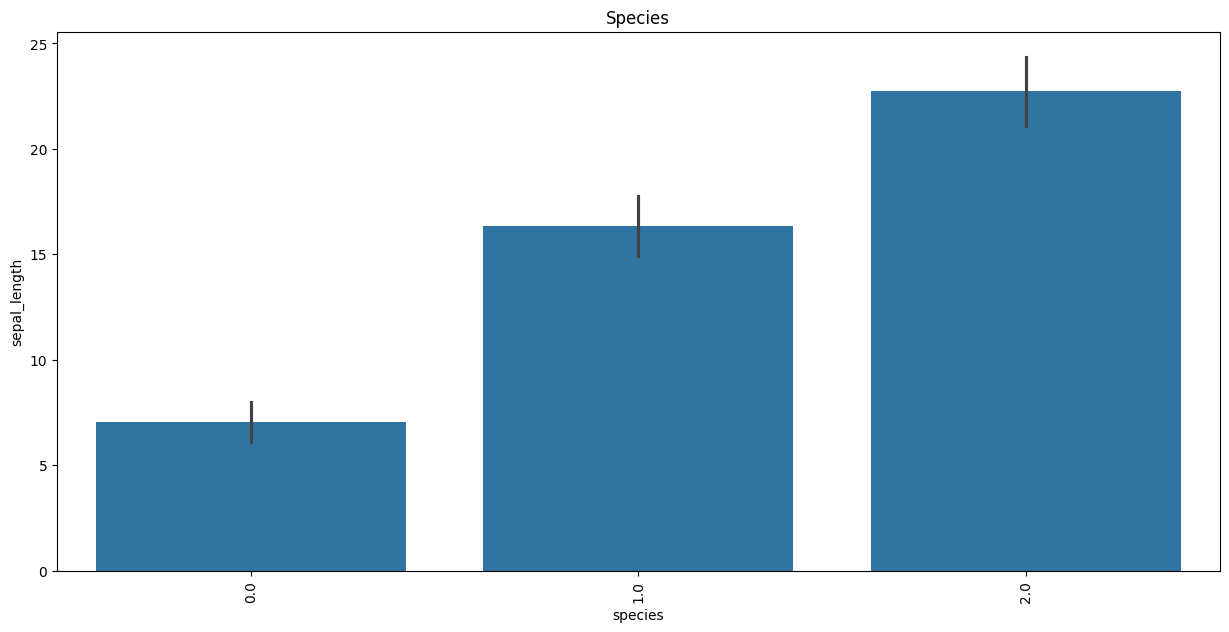

In [14]:
# Relationship b/w species and sepal_length
plt.figure(figsize=(15,7))
sns.barplot(data=df, x='species', y='sepal_length').set(title='Species', xlabel='species')
plt.xticks(rotation=90);

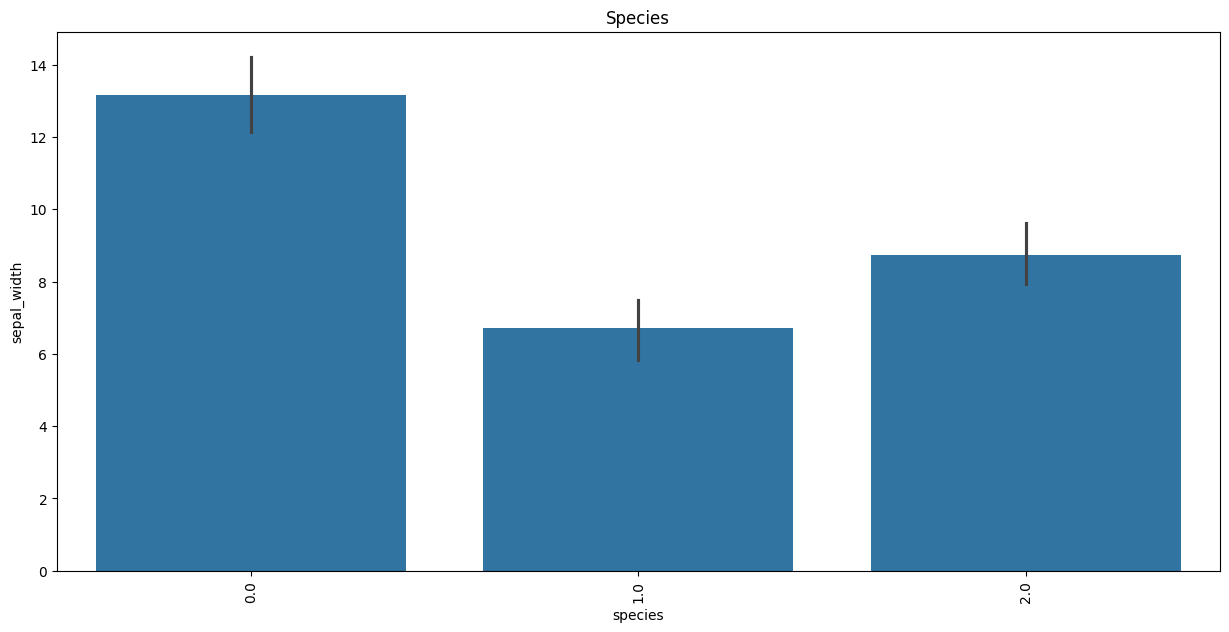

In [15]:
# Relationship b/w species and sepal_width
plt.figure(figsize=(15,7))
sns.barplot(data=df, x='species', y='sepal_width').set(title='Species', xlabel='species')
plt.xticks(rotation=90);

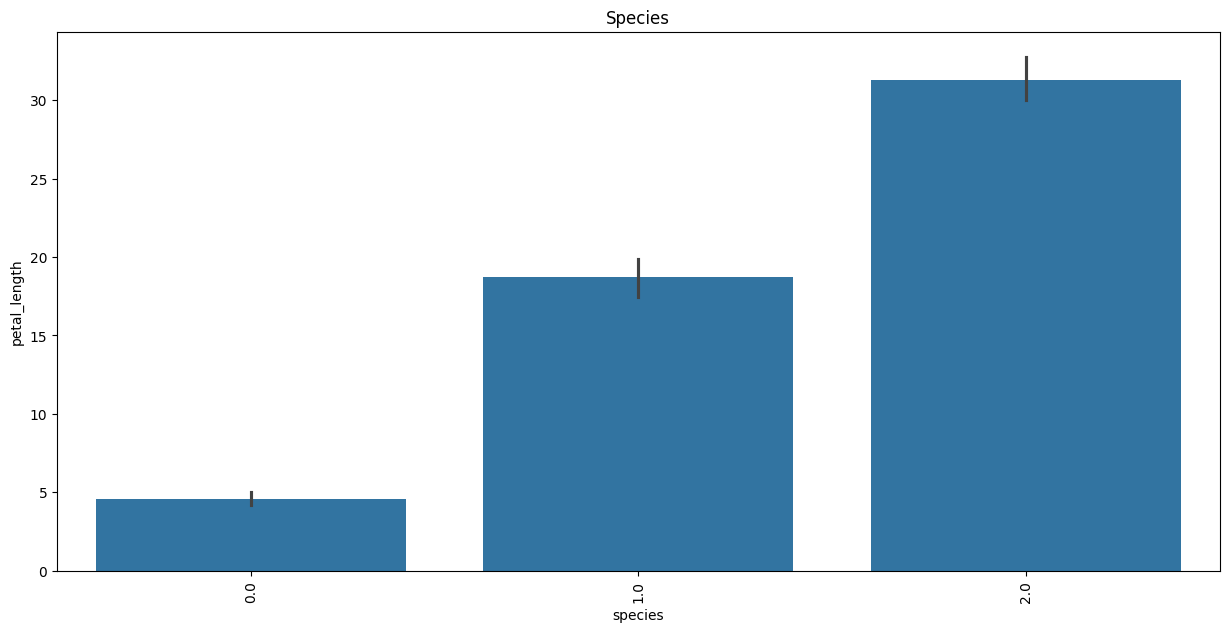

In [16]:
# Relationship b/w species and petal_length
plt.figure(figsize=(15,7))
sns.barplot(data=df, x='species', y='petal_length').set(title='Species', xlabel='species')
plt.xticks(rotation=90);

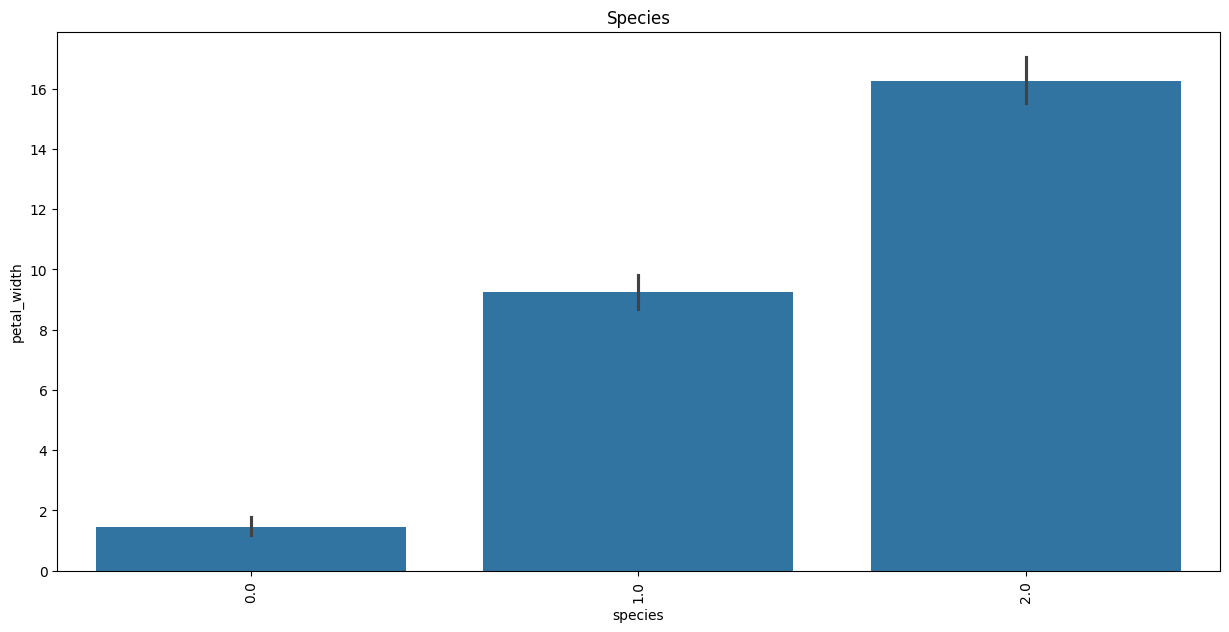

In [17]:
# Relationship b/w species and petal_width
plt.figure(figsize=(15,7))
sns.barplot(data=df, x='species', y='petal_width').set(title='Species', xlabel='species')
plt.xticks(rotation=90);

In [18]:
# Check Correlation for the DataFrame
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.115744,0.897970,0.818592,0.785590
sepal_width,-0.115744,1.000000,-0.305776,-0.294547,-0.421028
petal_length,0.897970,-0.305776,1.000000,0.944711,0.938885
petal_width,0.818592,-0.294547,0.944711,1.000000,0.947668
species,0.785590,-0.421028,0.938885,0.947668,1.000000


In [19]:
# Separate the dataset into features(x) and target(y)
x = df.drop('species',axis=1)
y = df['species']

# **Train Test Split**

In [20]:
x_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# **Model Evaluation**

In [21]:
# Applying LogisticRegression Algorithm
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
y_pred = model.predict(X_test)
y_pred

array([1., 0., 2., 1., 1., 0., 1., 2., 1., 1., 2., 0., 0., 0., 0., 1., 2.,
       1., 1., 2., 0., 2., 0., 2., 2., 2., 2., 2., 0., 0.])

[Text(0.5, 1.0, 'Relationship between Features')]

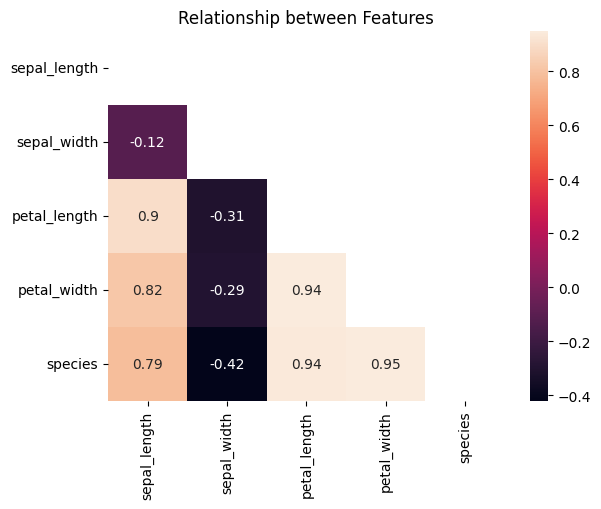

In [23]:
# HeatMap for Correlation
sns.heatmap(df.corr(),annot = True,
           mask = np.triu(np.ones_like(df.corr()))).set(title='Relationship between Features')

In [24]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test,y_pred)
confusion

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

[Text(0.5, 1.0, 'Logistic Regression Confusion Matrix'),
 Text(0.5, 23.52222222222222, 'Actual'),
 Text(50.722222222222214, 0.5, 'Predicted')]

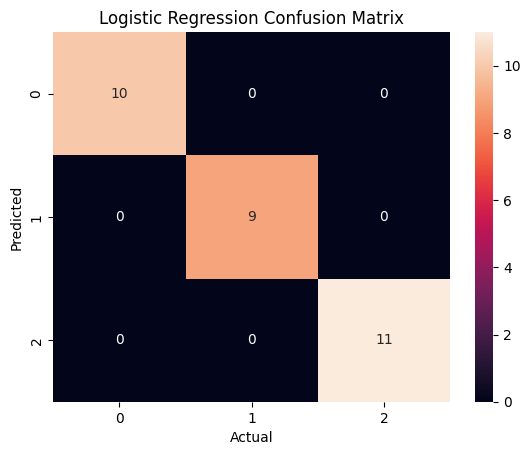

In [25]:
# HeatMap for Confusion Matrix
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True).set(title='Logistic Regression Confusion Matrix',xlabel='Actual',ylabel='Predicted')

In [26]:
# Checking Accuracy of the Model
accuracy = accuracy_score(y_test,y_pred)
accuracy

1.0

In [27]:
# Applying DecisionTreeClassifier Algorithm
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier()
model1.fit(x_train, y_train)

DecisionTreeClassifier()

In [28]:
y_pred1 = model1.predict(X_test)
y_pred1

array([1., 0., 2., 1., 1., 0., 1., 2., 1., 1., 2., 0., 0., 0., 0., 1., 2.,
       1., 1., 2., 0., 2., 0., 2., 2., 2., 2., 2., 0., 0.])

In [29]:
confusion = confusion_matrix(y_test,y_pred1)
confusion

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

In [30]:
# Checking Accuracy of the Model
accuracy = accuracy_score(y_test,y_pred1)
accuracy

1.0

In [31]:
# Applying DecisionTreeClassifier Algorithm
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier()
model2.fit(x_train, y_train)

RandomForestClassifier()

In [32]:
y_pred2= model2.predict(X_test)
y_pred2

array([1., 0., 2., 1., 1., 0., 1., 2., 1., 1., 2., 0., 0., 0., 0., 1., 2.,
       1., 1., 2., 0., 2., 0., 2., 2., 2., 2., 2., 0., 0.])

In [33]:
confusion = confusion_matrix(y_test,y_pred2)
confusion

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

In [34]:
# Checking Accuracy of the Model
accuracy = accuracy_score(y_test,y_pred2)
accuracy

1.0

# **Prediction**

In [37]:
# Sample measurements of a Species
sample_measurements = np.array([4.0,11.0,3.0,1.0])
result =list(model.predict([sample_measurements]))
predicted_result=encode.inverse_transform([result])
print('Predicted Species is :',predicted_result)

Predicted Species is : [['Iris-setosa']]
